## Métodos de Otimização: Métodos Heuristicos

### Recozimento Simulado

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
import time
name = 'Recozimento Simulado' 
Start = time.time()

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

In [3]:
# Método Baseado no algoritmo de Metropolis-Hasting
T = 1000 #Temperatura inicial

nFunc = 18; Qvar = 2
countFunc = 0
nvar=2
Ns=20
Nit=5
RT=0.8
niter_max = 50
#chute incial:
x1 = 1
x2 = 0

xnew=np.zeros(nvar, dtype='float')
xold=np.zeros(nvar, dtype='float')
xbest=np.zeros(nvar, dtype='float')
N=np.zeros(nvar, dtype='float')
Vu=np.zeros(nvar, dtype='float')
V=3*np.ones(nvar, dtype='float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
layout = "{0:.5f}"
fHist = []

xold[0]=x1; xold[1]=x2; Fold, countFunc = f(xold,nFunc,Qvar,countFunc)
xbest = xold.copy(); fbest, countFunc = f(xold,nFunc,Qvar,countFunc)
xmin[0] = -10; xmin[1] = -10
xmax[0] = 10; xmax[1] = 10
fHist.append(fbest)
c = 2
niter = 0
flag = 1
while niter<niter_max:
    for k in range(0,Nit):
        N=np.zeros(nvar, dtype='float')
        for j in range(0,Ns):
            for i in range(0,nvar):
                xnew = xold.copy()
                flag = 1
                R = random.uniform(-1,1)
                xnew[i] = xold[i] + R*V[i]
                if (xnew[i]>xmax[i]) or (xnew[i]<xmin[i]):
                    xnew = xold.copy()
                    flag = 0
                Fnew,countFunc = f(xnew,nFunc,Qvar,countFunc)
                Fold,countFunc = f(xold,nFunc,Qvar,countFunc)
                if (Fnew<Fold) and flag == 1:
                    xold = xnew.copy()
                    N[i] = N[i] + 1
                    if Fnew < fbest:
                        fbest = Fnew
                        xbest = xnew.copy()
                elif flag == 1:
                    P = np.exp((Fold-Fnew)/T)
                    R = random.uniform(0,1)
                    if P > R:
                        xold = xnew.copy()
                        N[i] = N[i] + 1
        for i in range(0,nvar):
            if N[i]>0.6*Ns:
                Vu[i] = V[i]*(1 + c*(N[i]/Ns-0.6)/0.4)
            elif N[i]<0.4*Ns:
                Vu[i] = V[i]/(1+c*(0.4-N[i]/Ns)/0.4)
            else:
                Vu[i] = V[i]
        V = Vu.copy()
    T = T*RT
    print("Coordenadas: " + layout.format(xbest[0])+" "+layout.format(xbest[1])+" "+"Resultado: "+layout.format(fbest))
    fHist.append(fbest)
    niter += 1

Coordenadas: 1.68508 -6.42959 Resultado: -10.43009
Coordenadas: 1.68508 -6.42959 Resultado: -10.43009
Coordenadas: 1.68508 -6.42959 Resultado: -10.43009
Coordenadas: -1.53611 -6.42821 Resultado: -10.50008
Coordenadas: -1.53611 -6.42821 Resultado: -10.50008
Coordenadas: -1.51812 2.92638 Resultado: -10.59191
Coordenadas: -1.51812 2.92638 Resultado: -10.59191
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -10.82831
Coordenadas: 1.65791 0.02178 Resultado: -

In [4]:
print(T)

0.014272476927059633


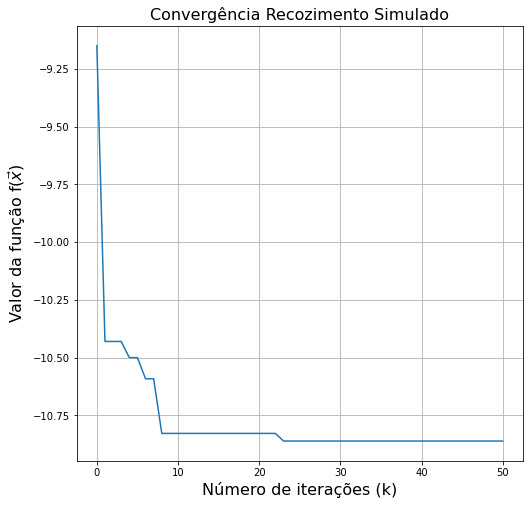

In [5]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,niter_max+1),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [6]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  20002
Tempo de Execução = 343.9181866645813 s
